# handling MNIST dataset 
Take image and create classification model to classify the image in 10 different classes 

``` 
First create basic neural network with 28x28 input and 10 output layers - no hidden layers

In [1]:
from tensorflow import keras 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# create train and validation set 
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  25, 254, 228,  91,  12,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 142, 253, 253, 253, 152,   7,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 120, 253, 253, 253, 253, 167,  76,   0,   0,   0,
          0,   0],
       [  

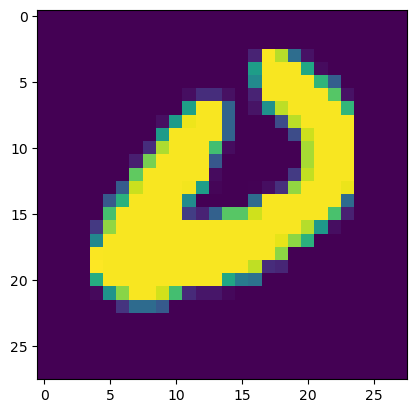

In [5]:
plt.imshow(X_train[0])

In [6]:
y_train[0]

np.uint8(0)

In [7]:
# scale the training set and convert to float 
X_train = X_train/255.0 
X_test = X_test/255.0 
X_val = X_val/255.0

In [8]:
X_train[0].shape

(28, 28)

In [9]:
X_train[0].flatten()

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
# Create the model with 784 input layers and 10 output layers (simple ANN)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
FILE_NAME = "output/video6/no_hidden_estimator.keras"

# create checkpoints - one to save the best model and another one with early stopping 
early_stopping_chkp = keras.callbacks.EarlyStopping(patience=25,
                                                    restore_best_weights=True)

best_estimator_chkp = keras.callbacks.ModelCheckpoint(FILE_NAME, save_best_only=True)

In [13]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[best_estimator_chkp, early_stopping_chkp])

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.7938 - loss: 0.7890 - val_accuracy: 0.9052 - val_loss: 0.3410
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.9096 - loss: 0.3264 - val_accuracy: 0.9143 - val_loss: 0.3064
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - accuracy: 0.9165 - loss: 0.2958 - val_accuracy: 0.9177 - val_loss: 0.2942
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 634us/step - accuracy: 0.9208 - loss: 0.2818 - val_accuracy: 0.9190 - val_loss: 0.2881
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - accuracy: 0.9231 - loss: 0.2731 - val_accuracy: 0.9198 - val_loss: 0.2845
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - accuracy: 0.9252 - loss: 0.2671 - val_accuracy: 0.9206 - val_loss: 0.2823
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step - accuracy: 0.9265 - loss: 0.2624 - val_accuracy: 0.9215 - val_loss: 0.2809
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 

In [14]:
# get the best model and evaluate on test data set 
best_model = keras.models.load_model(FILE_NAME)

In [15]:
# evaluate accuracy score on test dataset - gives loss, accuracy
best_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.9148 - loss: 0.3038


[0.2697111964225769, 0.9244999885559082]

```
Training Accuracy: 93.73% 
Validation Accuracy: 92.17% 
Testing Accuracy: 92.48% 

Not bad! Lets check the confusion matrix

In [16]:
# Make predictions using this model
y_pred = best_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step


In [17]:
y_pred[:10]

array([[3.70564038e-07, 6.84085427e-12, 1.04475896e-06, 7.04824831e-03,
        2.56130335e-07, 7.26609005e-06, 1.36529356e-11, 9.92714286e-01,
        2.67786909e-05, 2.01689531e-04],
       [1.42875666e-04, 2.29636430e-06, 9.94915426e-01, 7.97615285e-05,
        5.82214068e-15, 1.66533492e-03, 3.10340803e-03, 2.91035951e-18,
        9.09998853e-05, 4.69515233e-15],
       [9.14240218e-07, 9.77897465e-01, 1.41171534e-02, 2.61047436e-03,
        1.02432154e-04, 9.95880226e-04, 8.30922276e-04, 2.12400468e-04,
        3.06884991e-03, 1.63386503e-04],
       [9.99596775e-01, 1.40420202e-11, 1.04731662e-04, 4.99581483e-06,
        3.37576580e-08, 4.28711282e-05, 1.89516519e-04, 1.69515515e-05,
        2.96600192e-05, 1.44334153e-05],
       [1.98832888e-04, 4.66276404e-08, 1.63075689e-03, 1.18953230e-05,
        9.76800263e-01, 6.87925713e-05, 1.99908204e-03, 1.82169129e-03,
        3.07902764e-03, 1.43896164e-02],
       [5.69329437e-08, 9.89438951e-01, 2.28408794e-03, 1.65356009e-03,
   

```
As we see the data returned from neural network is scores from each neuron. lets use np.argmax() fuction to pick the best score 


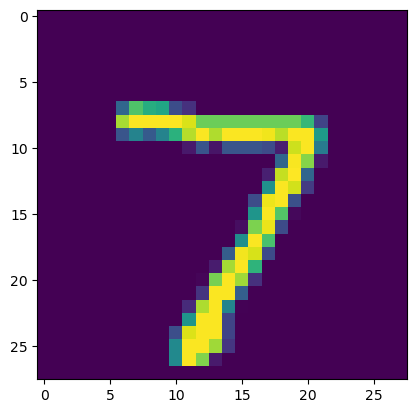

In [18]:
plt.imshow(X_test[0])

In [19]:
np.argmax(y_pred[0])

np.int64(7)

``` 
Looks like the model is able to predict 7 correctly. Lets build confusion matrix

In [20]:
len(y_pred)

10000

In [21]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [22]:
y_pred_values = [np.argmax(y_pred[i]) for i in range(len(y_pred))]
y_pred_values

[np.int64(7),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(9),
 np.int64(0),
 np.int64(6),
 np.int64(9),
 np.int64(0),
 np.int64(1),
 np.int64(5),
 np.int64(9),
 np.int64(7),
 np.int64(3),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(6),
 np.int64(5),
 np.int64(4),
 np.int64(0),
 np.int64(7),
 np.int64(4),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(6),
 np.int64(7),
 np.int64(2),
 np.int64(7),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(7),
 np.int64(4),
 np.int64(2),
 np.int64(3),
 np.int64(5),
 np.int64(1),
 np.int64(2),
 np.int64(4),
 np.int64(4),
 np.int64(6),
 np.int64(3),
 np.int64(5),
 np.int64(5),
 np.int64(6),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(9),
 np.int64(5),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(2),
 np.int64(7),
 np.int64(4),
 np.int64(2),
 np.int64(4),
 np.int64(3),
 np.int64(0),
 np.int64(7),
 np.in

In [23]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_values)

In [24]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 950,    0,    3,    3,    1,    7,   10,    4,    2,    0],
       [   0, 1107,    4,    2,    0,    1,    4,    2,   15,    0],
       [   3,    7,  926,   15,    7,    4,   12,   13,   43,    2],
       [   1,    0,   19,  922,    1,   18,    2,   12,   28,    7],
       [   1,    1,    6,    1,  911,    0,   11,    8,   12,   31],
       [   9,    2,    2,   41,    7,  763,   13,    9,   40,    6],
       [   9,    3,    6,    1,    6,   13,  916,    1,    3,    0],
       [   1,    6,   25,    5,    4,    0,    0,  957,    4,   26],
       [   3,    5,    6,   20,    8,   17,    7,   11,  893,    4],
       [   8,    7,    2,    9,   28,    4,    0,   34,   17,  900]],
      dtype=int32)>

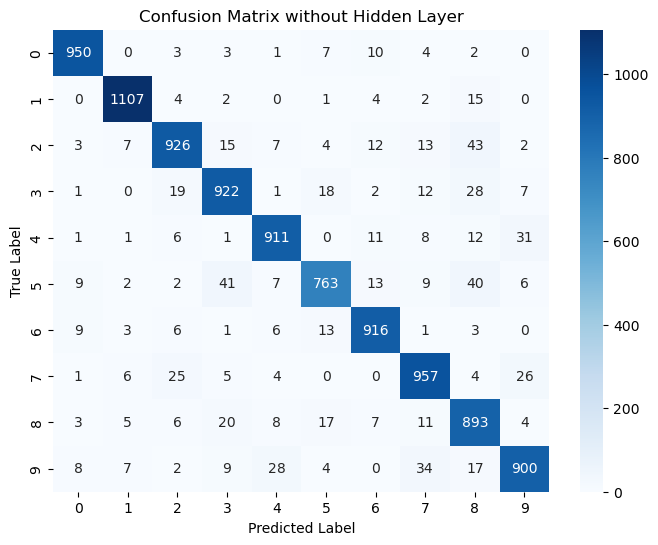

In [25]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix without Hidden Layer')
plt.show()

``` 
Add hidden layers 

In [26]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [27]:
# Create the model with 784 input layers and 10 output layers (simple ANN)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# add 100 neurons - random selected value 
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
FILE_NAME = "output/video6/one_hidden_estimator.keras"

# create checkpoints - one to save the best model and another one with early stopping 
early_stopping_chkp = keras.callbacks.EarlyStopping(patience=25,
                                                    restore_best_weights=True)

best_estimator_chkp = keras.callbacks.ModelCheckpoint(FILE_NAME, save_best_only=True)

In [29]:
# use same callbacks as previous model 
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[best_estimator_chkp, early_stopping_chkp])

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8604 - loss: 0.4976 - val_accuracy: 0.9433 - val_loss: 0.1937
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9549 - loss: 0.1564 - val_accuracy: 0.9567 - val_loss: 0.1434
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9702 - loss: 0.1042 - val_accuracy: 0.9618 - val_loss: 0.1233
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9776 - loss: 0.0769 - val_accuracy: 0.9647 - val_loss: 0.1183
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9836 - loss: 0.0591 - val_accuracy: 0.9659 - val_loss: 0.1138
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9873 - loss: 0.0460 - val_accuracy: 0.9670 - val_loss: 0.1158
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9909 - loss: 0.0361 - val_accuracy: 0.9660 - val_loss: 0.1191
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9930 - loss: 0

In [30]:
best_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.9148 - loss: 0.3038


[0.2697111964225769, 0.9244999885559082]

In [31]:
best_model = keras.models.load_model(FILE_NAME)

In [32]:
y_pred = best_model.predict(X_test)
y_pred_values = [np.argmax(i) for i in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step


``` 
Training Accuracy: 99.95% 
Validation Accuracy: 97.30% 
Test Accuracy: 92.44% 

Much better than last time where accuracy score was around 92% 

In [33]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_values)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    1,    1,    2,    4,    2,    5,    4],
       [   0, 1123,    4,    2,    0,    1,    0,    2,    3,    0],
       [   3,    0, 1009,    1,    1,    0,    3,    6,    9,    0],
       [   0,    0,    4,  995,    1,    1,    0,    2,    3,    4],
       [   0,    0,    8,    1,  945,    0,    3,    2,    2,   21],
       [   4,    2,    0,   15,    3,  858,    2,    1,    6,    1],
       [   4,    3,    6,    2,    2,    3,  930,    0,    8,    0],
       [   2,    4,   10,    9,    0,    0,    0,  996,    2,    5],
       [   3,    0,    5,   14,    3,    6,    1,    2,  936,    4],
       [   1,    3,    1,   10,    8,    2,    1,    7,    5,  971]],
      dtype=int32)>

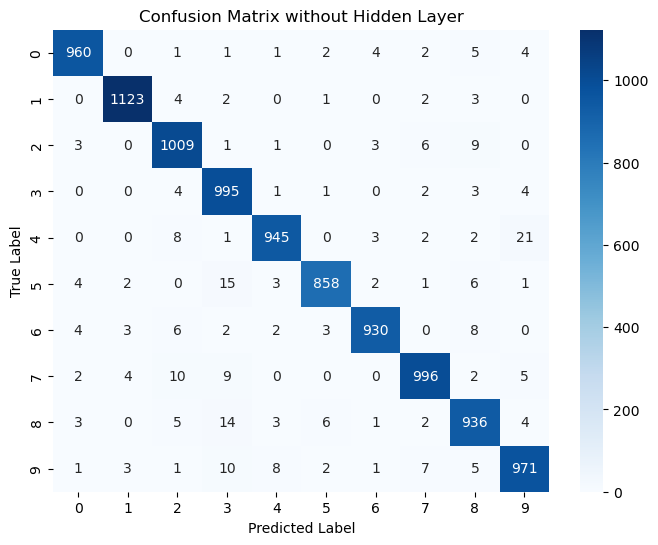

In [34]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix without Hidden Layer')
plt.show()

``` 
This is much better. Over 39 2 were misclassified as 8 in previous model is now reduced to 15 
Can we do better? - Let's try with second hidden layer. First layer where was able to pick straight lines easily - may be model will be able to predict with curvy lines 

In [35]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [36]:
# Create the model with 784 input layers and 10 output layers (simple ANN)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# add 100 neurons - random selected value 
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [38]:
FILE_NAME = "output/video6/two_hidden_estimator.keras"

# create checkpoints - one to save the best model and another one with early stopping 
early_stopping_chkp = keras.callbacks.EarlyStopping(patience=25,
                                                    restore_best_weights=True)

best_estimator_chkp = keras.callbacks.ModelCheckpoint(FILE_NAME, save_best_only=True)

In [39]:
# use same callbacks as previous model 
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[best_estimator_chkp, early_stopping_chkp])

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8639 - loss: 0.4806 - val_accuracy: 0.9493 - val_loss: 0.1665
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9595 - loss: 0.1312 - val_accuracy: 0.9624 - val_loss: 0.1258
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9731 - loss: 0.0857 - val_accuracy: 0.9663 - val_loss: 0.1176
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9813 - loss: 0.0619 - val_accuracy: 0.9579 - val_loss: 0.1470
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9856 - loss: 0.0472 - val_accuracy: 0.9653 - val_loss: 0.1240
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9879 - loss: 0.0368 - val_accuracy: 0.9690 - val_loss: 0.1223
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9899 - loss: 0.0295 - val_accuracy: 0.9643 - val_loss: 0.1369
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9912 - loss: 0

In [40]:
best_model = keras.models.load_model(FILE_NAME)

In [41]:
best_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.9717 - loss: 0.1260


[0.10735902190208435, 0.9747999906539917]

```
Training Accuracy: 99.8% 
Validation Accuracy: 97.33% 
Testing Accuracy: 97.47% 

Much better than previous model where the testing accuracy was around 92% 

In [42]:
y_pred = best_model.predict(X_test)
y_pred_values = [np.argmax(i) for i in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step


In [44]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_values)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    0,    0,    2,    1,    0,    0,    3,    3],
       [   0, 1126,    2,    1,    0,    0,    1,    1,    4,    0],
       [   4,    0, 1019,    3,    1,    0,    0,    2,    3,    0],
       [   0,    0,    6,  965,    0,   11,    0,    3,    8,   17],
       [   0,    1,    7,    0,  956,    0,    1,    2,    2,   13],
       [   3,    0,    0,    4,    2,  869,    4,    2,    4,    4],
       [   9,    3,    5,    1,    7,    6,  923,    0,    4,    0],
       [   2,    1,   13,    0,    0,    0,    0, 1002,    3,    7],
       [   8,    2,    4,    3,    5,    6,    1,    3,  938,    4],
       [   2,    4,    0,    2,   13,    1,    0,    5,    3,  979]],
      dtype=int32)>

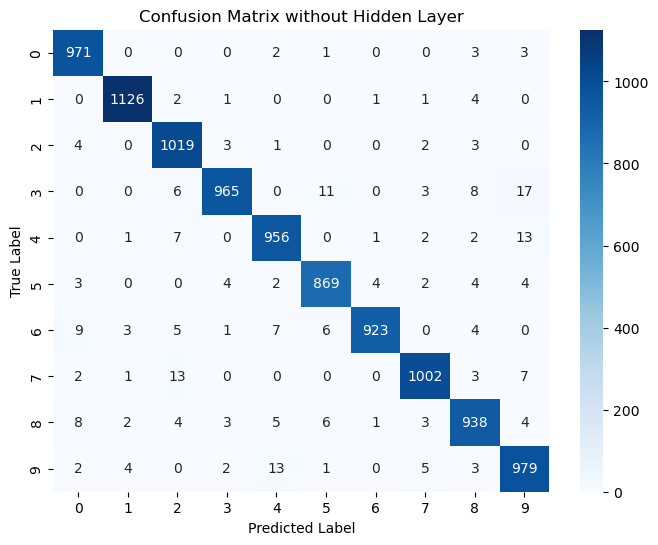

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix without Hidden Layer')
plt.show()

In [51]:
X_val[0].shape

(28, 28)

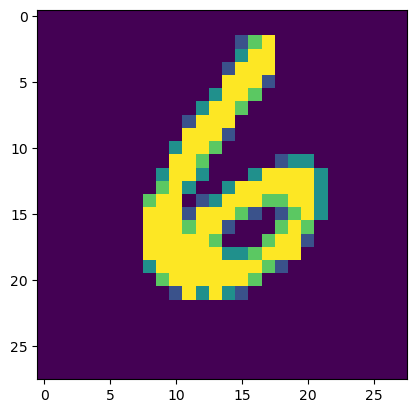

In [53]:
plt.imshow(X_val[0])

In [62]:
[np.array(X_val[0]).reshape(1, 28, 28, 1)]

[array([[[[0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.

In [60]:
np.argmax(best_model.predict([np.array(X_val[0]).reshape(1, 28, 28, 1)]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


np.int64(6)